In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data["tensile_strength"] = data["tension_strenght"]
data.drop(["tension_strenght","roughness","elongation"],axis=1,inplace=True)
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,tensile_strength
0,0.02,8,90,grid,220,60,40,abs,0,18
1,0.02,7,90,honeycomb,225,65,40,abs,25,16
2,0.02,1,80,grid,230,70,40,abs,50,8
3,0.02,4,70,honeycomb,240,75,40,abs,75,10
4,0.02,6,90,grid,250,80,40,abs,100,5


In [4]:
data.describe()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,print_speed,fan_speed,tensile_strength
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000,50.000000,50.000000
mean,0.106000,5.220000,53.40000,221.500000,70.000000,64.0000,50.000000,20.080000
std,0.064397,2.922747,25.36348,14.820353,7.142857,29.6923,35.714286,8.925634
min,0.020000,1.000000,10.00000,200.000000,60.000000,40.0000,0.000000,4.000000
25%,0.060000,3.000000,40.00000,210.000000,65.000000,40.0000,25.000000,12.000000
50%,0.100000,5.000000,50.00000,220.000000,70.000000,60.0000,50.000000,19.000000
75%,0.150000,7.000000,80.00000,230.000000,75.000000,60.0000,75.000000,27.000000
max,0.200000,10.000000,90.00000,250.000000,80.000000,120.0000,100.000000,37.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   tensile_strength    50 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 4.0+ KB


In [6]:
data['infill_pattern'].replace(['grid','honeycomb'], [0,1], inplace = True)
data['material'].replace(['abs','pla'], [0,1], inplace = True)
# honeycomb is 1
# pla is 1

/var/folders/7j/49fx625s6dl9m3hrvjgj5px80000gn/T/ipykernel_32768/1360685486.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['infill_pattern'].replace(['grid','honeycomb'], [0,1], inplace = True)
/var/folders/7j/49fx625s6dl9m3hrvjgj5px80000gn/T/ipykernel_32768/1360685486.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.n

In [7]:
data.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,tensile_strength
0,0.02,8,90,0,220,60,40,0,0,18
1,0.02,7,90,1,225,65,40,0,25,16
2,0.02,1,80,0,230,70,40,0,50,8
3,0.02,4,70,1,240,75,40,0,75,10
4,0.02,6,90,0,250,80,40,0,100,5


<Axes: xlabel='tensile_strength', ylabel='Density'>

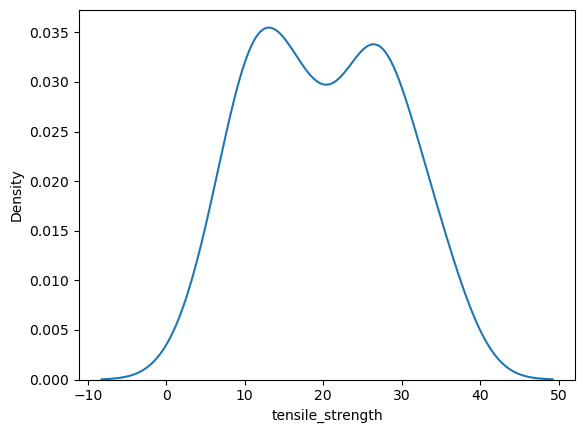

In [9]:
sns.kdeplot(data=data,x="tensile_strength")

<Axes: >

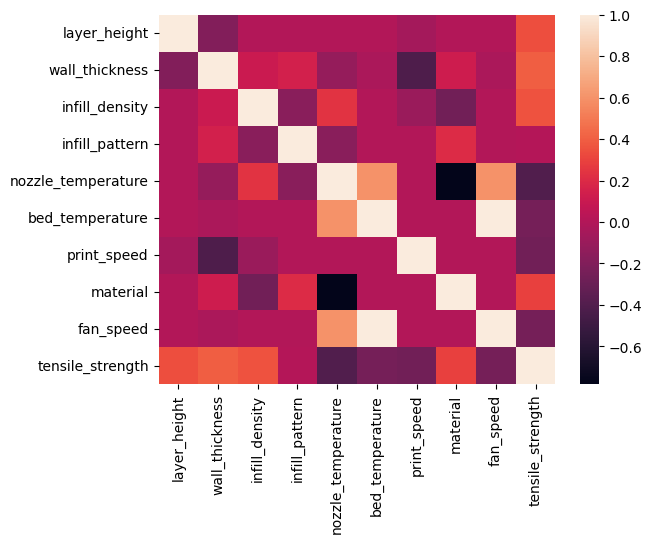

In [10]:
sns.heatmap(data=data.corr())

In [11]:
data.corr()["tensile_strength"].sort_values()

nozzle_temperature   -0.405908
print_speed          -0.264590
fan_speed            -0.252883
bed_temperature      -0.252883
infill_pattern        0.009054
material              0.289726
layer_height          0.338230
infill_density        0.358464
wall_thickness        0.399849
tensile_strength      1.000000
Name: tensile_strength, dtype: float64

In [12]:
data[data["material"]==1]

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,tensile_strength
5,0.02,10,40,1,200,60,40,1,0,24
6,0.02,5,10,0,205,65,40,1,25,12
7,0.02,10,10,1,210,70,40,1,50,14
8,0.02,9,70,0,215,75,40,1,75,27
9,0.02,8,40,1,220,80,40,1,100,25
15,0.06,10,90,1,200,60,60,1,0,27
16,0.06,3,40,0,205,65,60,1,25,23
17,0.06,8,30,1,210,70,60,1,50,26
18,0.06,5,80,0,215,75,60,1,75,33
19,0.06,10,50,1,220,80,60,1,100,29


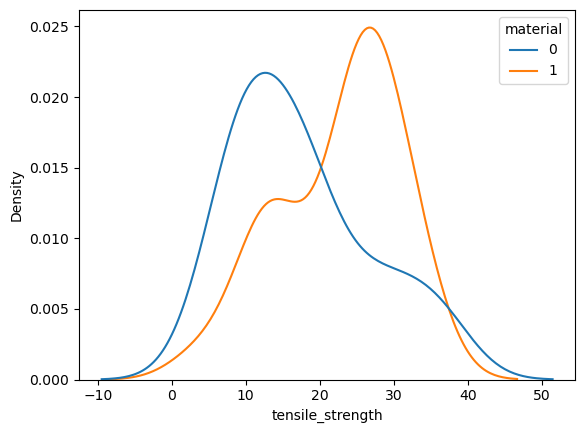

In [13]:
sns.kdeplot(data=data,x="tensile_strength",hue="material");

<Axes: xlabel='infill_density', ylabel='tensile_strength'>

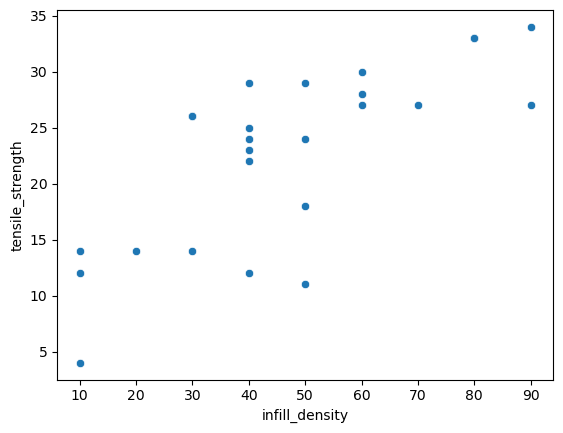

In [14]:
sns.scatterplot(data=data[data["material"]==1],x="infill_density",y="tensile_strength")

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop("tensile_strength",axis=1)
y = data["tensile_strength"]

In [17]:
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [20]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
param_grid = {"alpha" : [0.1,1,5,10,50,100], "l1_ratio" : [0.1,0.5,0.7,0.9,0.95,0.99,1]}
base_elastic_net_model = ElasticNet()

In [23]:
grid_model = GridSearchCV(estimator=base_elastic_net_model,param_grid=param_grid,scoring="neg_mean_squared_error",
                          cv=5,verbose=2)

In [24]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.95; total time=   0.0s
[CV] END ............................alpha=50, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [25]:
y_pred = grid_model.predict(scaled_X_test)

In [26]:
mean_absolute_error(y_test,y_pred)

2.09766913589347

In [27]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.5992754073729802

In [28]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002845,0.001441,0.000985,0.000355,0.1,0.10,"{'alpha': 0.1, 'l1_ratio': 0.1}",-42.718745,-26.938341,-84.296192,-72.224076,-33.214289,-51.878329,22.446000,5
1,0.001184,0.000230,0.000599,0.000261,0.1,0.50,"{'alpha': 0.1, 'l1_ratio': 0.5}",-42.659542,-27.289909,-83.217970,-70.543889,-35.818964,-51.906055,21.345032,6
2,0.001257,0.000448,0.000680,0.000291,0.1,0.70,"{'alpha': 0.1, 'l1_ratio': 0.7}",-43.157277,-27.847231,-83.139711,-69.096399,-37.956326,-52.239389,20.593478,7
3,0.001211,0.000226,0.000438,0.000063,0.1,0.90,"{'alpha': 0.1, 'l1_ratio': 0.9}",-43.799596,-27.965690,-82.933072,-69.338183,-39.774556,-52.762220,20.243116,11
4,0.001222,0.000249,0.000403,0.000031,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-43.459085,-27.867697,-82.988111,-69.418311,-40.129968,-52.772634,20.282449,12
5,0.001709,0.000645,0.000417,0.000057,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-42.917413,-27.689023,-83.264450,-69.489107,-40.334339,-52.738866,20.446074,10
6,0.001191,0.000183,0.000391,0.000024,0.1,1.00,"{'alpha': 0.1, 'l1_ratio': 1}",-42.709783,-27.630252,-83.400225,-69.507794,-40.370671,-52.723745,20.519805,9
7,0.000774,0.000046,0.000398,0.000048,1.0,0.10,"{'alpha': 1, 'l1_ratio': 0.1}",-41.962645,-35.611993,-95.420228,-71.729349,-30.139988,-54.972841,24.809473,14
8,0.000739,0.000012,0.000372,0.000006,1.0,0.50,"{'alpha': 1, 'l1_ratio': 0.5}",-40.710215,-33.189209,-95.964157,-71.393072,-28.436033,-53.938537,25.794241,13
9,0.000746,0.000013,0.000374,0.000009,1.0,0.70,"{'alpha': 1, 'l1_ratio': 0.7}",-39.177351,-31.271384,-94.903762,-68.622965,-27.255687,-52.246230,25.780339,8


In [29]:
grid_model.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [30]:
scaled_X = scaler.fit_transform(X)

In [31]:
grid_model.fit(scaled_X,y)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [32]:
actual = [[0.2,0.8,100,1,205,45,70,1,0]]

In [34]:
actual = scaler.transform(actual)

/Users/angadriat/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
"The predicted value of Tensile strength is " + str(np.round(grid_model.predict(actual),2)[0]) + " MPa"
# for our actual exp

'The predicted value of Tensile strength is 30.71 MPa'